<a href="https://colab.research.google.com/github/AshwinPrksh00/Historical-Hourly-Weather-Data/blob/main/EDA_Tel_Aviv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Tel-Aviv

In [ ]:
#Importing all preprocessing libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Import the dataset
df = pd.read_csv('tel_aviv_orig.csv')
df['datetime'] = pd.DatetimeIndex(df.datetime)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with Missing Data

In [ ]:
#Checking out total null values
df.isnull().sum()

datetime                  0
humidity               1113
pressure                930
temperature             793
weather_description     793
wind_direction          793
wind_speed              794
dtype: int64

In [ ]:
df[df['temperature'].isna()]

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44461,2017-10-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44462,2017-10-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44463,2017-10-28 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44464,2017-10-28 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Since we have 793 values of fully empty rows and it is less than 5% of original data, we will remove them from dataset
df.drop(df[df['temperature'].isna()].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [ ]:
df.isnull().sum()

datetime                 0
humidity               320
pressure               137
temperature              0
weather_description      0
wind_direction           0
wind_speed               1
dtype: int64

In [ ]:
#Checking for outliers
px.box(df.pressure)

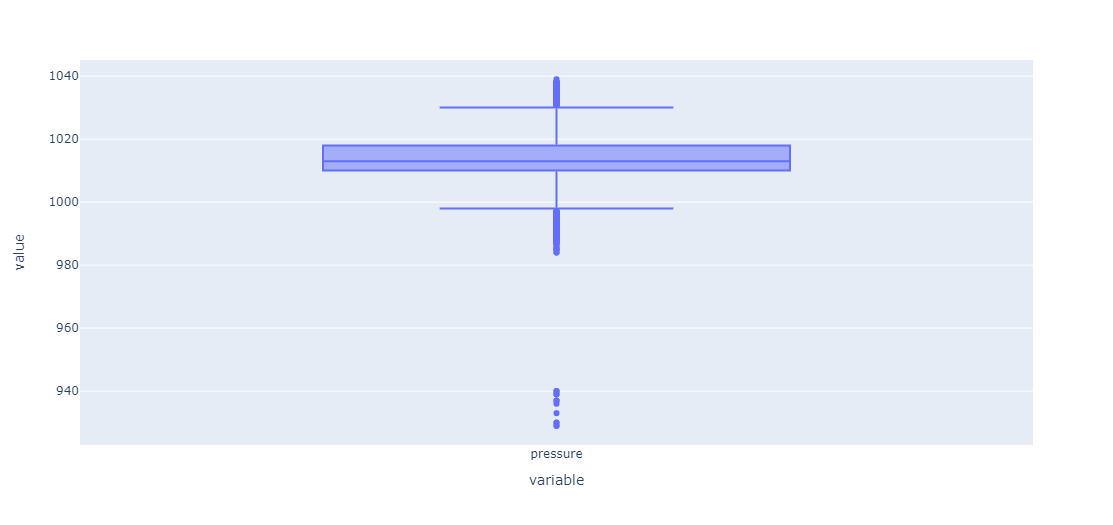

The above plot is saved as an image due to plotly being interactive and shuts out any dynamic generated image


In [ ]:
px.box(df.wind_speed)

In [ ]:
#Removing extreme outliers in pressure
df.drop(df[df.pressure<980].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [ ]:
#Removing extreme outliers in wind speed
df.drop(df[df.wind_speed>20].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [ ]:
#Filling in missing values by median
cols = ['humidity',	'pressure', 'wind_speed']
df[cols] = df[cols].fillna(df.median().iloc[0])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [ ]:
df.isnull().sum()

datetime               0
humidity               0
pressure               0
temperature            0
weather_description    0
wind_direction         0
wind_speed             0
dtype: int64

In [ ]:
df.weather_description.value_counts()

sky is clear                    21736
few clouds                       8237
scattered clouds                 7822
broken clouds                    2919
light rain                       1578
overcast clouds                   819
moderate rain                     541
dust                              163
heavy intensity rain              137
haze                              134
mist                              123
shower rain                        45
fog                                45
thunderstorm                       40
proximity thunderstorm             28
thunderstorm with rain             26
thunderstorm with light rain       14
drizzle                            10
thunderstorm with heavy rain        6
ragged shower rain                  4
snow                                4
smoke                               4
heavy intensity shower rain         3
very heavy rain                     2
light intensity drizzle             1
light intensity shower rain         1
Name: weathe

In [ ]:
#Incorporating the year, month, day and hour into dataset for diversity
df['datetime'] = pd.DatetimeIndex(df.datetime)
df['date'] = df.datetime.dt.date
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,date,year,month,day,hour
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0,2012-10-01,2012,10,1,13
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0,2012-10-01,2012,10,1,14
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0,2012-10-01,2012,10,1,15
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0,2012-10-01,2012,10,1,16
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0,2012-10-01,2012,10,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,20
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,21
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,22
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0,2017-10-27,2017,10,27,23


In [ ]:
#Averaging the original feature set according to date
df['avg_humidity'] = df.groupby('date')['humidity'].transform('mean')
df['avg_pressure'] = df.groupby('date')['pressure'].transform('mean')
df['avg_temperature'] = df.groupby('date')['temperature'].transform('mean')
df['avg_wind_direction'] = df.groupby('date')['wind_direction'].transform('mean')
df['avg_wind_speed'] = df.groupby('date')['wind_speed'].transform('mean')
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,date,year,month,day,hour,avg_humidity,avg_pressure,avg_temperature,avg_wind_direction,avg_wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0,2012-10-01,2012,10,1,13,62.909091,1012.000000,304.248983,248.181818,0.454545
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0,2012-10-01,2012,10,1,14,62.909091,1012.000000,304.248983,248.181818,0.454545
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0,2012-10-01,2012,10,1,15,62.909091,1012.000000,304.248983,248.181818,0.454545
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0,2012-10-01,2012,10,1,16,62.909091,1012.000000,304.248983,248.181818,0.454545
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0,2012-10-01,2012,10,1,17,62.909091,1012.000000,304.248983,248.181818,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,20,52.833333,1011.916667,295.823750,105.416667,1.875000
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,21,52.833333,1011.916667,295.823750,105.416667,1.875000
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0,2017-10-27,2017,10,27,22,52.833333,1011.916667,295.823750,105.416667,1.875000
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0,2017-10-27,2017,10,27,23,52.833333,1011.916667,295.823750,105.416667,1.875000


In [ ]:
#Now since we sepearted all components of datetime and date, it wont be required further
df1 = df.drop(['datetime', 'date'], axis=1).reset_index().drop('index', axis=1)
df1.head()

,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,year,month,day,hour,avg_humidity,avg_pressure,avg_temperature,avg_wind_direction,avg_wind_speed
0,63.0,1012.0,305.470000,sky is clear,101.0,0.0,2012,10,1,13,62.909091,1012.0,304.248983,248.181818,0.454545
1,62.0,1012.0,304.310000,sky is clear,315.0,0.0,2012,10,1,14,62.909091,1012.0,304.248983,248.181818,0.454545
2,62.0,1012.0,304.281841,sky is clear,307.0,0.0,2012,10,1,15,62.909091,1012.0,304.248983,248.181818,0.454545
3,62.0,1012.0,304.238015,sky is clear,294.0,0.0,2012,10,1,16,62.909091,1012.0,304.248983,248.181818,0.454545
4,62.0,1012.0,304.194188,sky is clear,282.0,0.0,2012,10,1,17,62.909091,1012.0,304.248983,248.181818,0.454545


In [ ]:
df1.describe()

,humidity,pressure,temperature,wind_direction,wind_speed,year,month,day,hour,avg_humidity,avg_pressure,avg_temperature,avg_wind_direction,avg_wind_speed
count,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000,44442.000000
mean,66.876041,1010.923923,294.515100,171.473426,2.719702,2014.782143,6.574659,15.705706,11.499707,66.876041,1010.923923,294.515100,171.473426,2.719702
std,16.406994,52.760446,6.675264,121.853537,1.917608,1.492680,3.448107,8.786382,6.922638,11.479595,32.171981,5.893352,54.458036,1.063985
min,5.000000,69.000000,271.049000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,11.833333,108.583333,277.747624,0.000000,0.000000
25%,58.000000,1009.000000,289.451000,40.000000,1.000000,2014.000000,4.000000,8.000000,5.000000,61.916667,1009.291667,289.485488,135.104167,2.083333
50%,69.000000,1013.000000,294.901250,184.000000,2.000000,2015.000000,7.000000,16.000000,12.000000,68.000000,1012.916667,294.685000,175.416667,2.583333
75%,78.000000,1018.000000,299.810000,280.000000,4.000000,2016.000000,10.000000,23.000000,17.000000,73.166667,1017.208333,300.006250,209.583333,3.041667
max,100.000000,1039.000000,320.930000,360.000000,69.000000,2017.000000,12.000000,31.000000,23.000000,100.000000,1037.416667,305.344167,331.541667,12.583333


In [ ]:
#Code for making the target variable into just 2 categories
df1['weather_description'] = ['sky is clear' if i == 'sky is clear' else 'sky is not clear' for i in df1['weather_description']]
df1.tail(20)

,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,year,month,day,hour,avg_humidity,avg_pressure,avg_temperature,avg_wind_direction,avg_wind_speed
44422,52.0,1013.0,291.71,sky is clear,120.0,2.0,2017,10,27,5,52.833333,1011.916667,295.82375,105.416667,1.875
44423,48.0,1013.0,292.71,sky is clear,0.0,0.0,2017,10,27,6,52.833333,1011.916667,295.82375,105.416667,1.875
44424,43.0,1013.0,295.59,sky is clear,0.0,0.0,2017,10,27,7,52.833333,1011.916667,295.82375,105.416667,1.875
44425,47.0,1013.0,297.59,sky is clear,270.0,3.0,2017,10,27,8,52.833333,1011.916667,295.82375,105.416667,1.875
44426,47.0,1013.0,299.04,sky is clear,230.0,2.0,2017,10,27,9,52.833333,1011.916667,295.82375,105.416667,1.875
44427,39.0,1012.0,299.48,sky is clear,240.0,3.0,2017,10,27,10,52.833333,1011.916667,295.82375,105.416667,1.875
44428,30.0,1011.0,301.48,sky is clear,240.0,3.0,2017,10,27,11,52.833333,1011.916667,295.82375,105.416667,1.875
44429,37.0,1011.0,301.59,sky is clear,250.0,4.0,2017,10,27,12,52.833333,1011.916667,295.82375,105.416667,1.875
44430,39.0,1011.0,300.59,sky is clear,270.0,5.0,2017,10,27,13,52.833333,1011.916667,295.82375,105.416667,1.875
44431,51.0,1011.0,300.15,sky is clear,280.0,4.0,2017,10,27,14,52.833333,1011.916667,295.82375,105.416667,1.875


In [ ]:
df1.weather_description.value_counts()

sky is not clear    22706
sky is clear        21736
Name: weather_description, dtype: int64

## Modelling

In [ ]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df1.drop('weather_description', axis=1)
target = df1['weather_description']


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

#Standardising the values 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

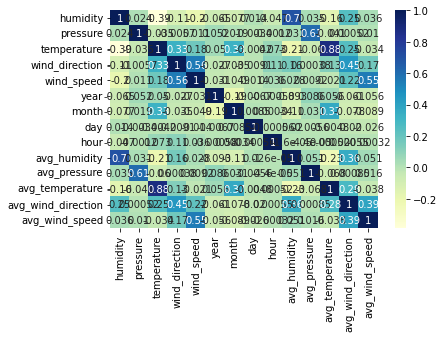

In [ ]:
#Correlation Matrix of Features
sns.heatmap(features.corr(), annot=True, cmap='YlGnBu')

In [ ]:
#Initialising a dictionary which stores all metrics
metrics_dict = dict()
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Histogram Based GBM', 'XGBoost', 'LightGBM', 'CatBoost', 'ANN', 'SVM', 'Logistic Regression']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle


def cross_val_report(model, X,Y, report=True, save=False):
  
  '''A Small function to do cross validation as well as printing Classification report
      Arguments():

      model : 
        The Classifier Model that was created with different ML Algorithms
      X : list/tuple 
        Contains both x_train and x_test values
      Y : list/tuple
        Contains both y_train and y_test values
      report: bool, default=True
        To print a classification report on testing data as well as a confusion matrix
      save: bool, default=False
        To save the model that is passed onto the function

      return: list
        A list containing various scores which is to be used for further analysis'''
        
  x_train, x_test = X[0], X[1]
  y_train, y_test = Y[0], Y[1]
  CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
  n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV, n_jobs=-1, error_score='raise')
  print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  clf_metrics = [accuracy_score(y_test, y_pred), np.mean(precision_score(y_test, y_pred, average=None)), np.mean(recall_score(y_test, y_pred, average=None)), np.mean(f1_score(y_test, y_pred, average=None))]

  if save:
    with open('savemodel.pkl', 'wb') as files:
      pickle.dump(model, files)
    print('Model saved to:' + os.getcwd() + '/savemodel.pkl')
  
  if report:
    print(classification_report(y_test, y_pred, zero_division=0))
    conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
    cm_display.plot()
    plt.show()
  return clf_metrics

### Logistic Regression

Accuracy: 0.698 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.70      0.68      0.69      6533
sky is not clear       0.70      0.71      0.71      6800

        accuracy                           0.70     13333
       macro avg       0.70      0.70      0.70     13333
    weighted avg       0.70      0.70      0.70     13333



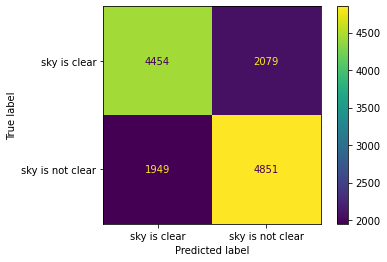

In [ ]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression()
metrics_dict[model_names[9]] = cross_val_report(lrclf, [x_train, x_test], [y_train, y_test])

### Ensemble Methods


Accuracy: 0.836 (0.006)
                  precision    recall  f1-score   support

    sky is clear       0.84      0.84      0.84      6533
sky is not clear       0.85      0.85      0.85      6800

        accuracy                           0.85     13333
       macro avg       0.85      0.85      0.85     13333
    weighted avg       0.85      0.85      0.85     13333



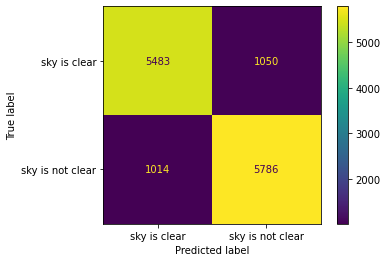

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dclf  = DecisionTreeClassifier(criterion='gini')
metrics_dict[model_names[0]] = cross_val_report(dclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.834 (0.006)
                  precision    recall  f1-score   support

    sky is clear       0.84      0.82      0.83      6533
sky is not clear       0.83      0.85      0.84      6800

        accuracy                           0.84     13333
       macro avg       0.84      0.84      0.84     13333
    weighted avg       0.84      0.84      0.84     13333



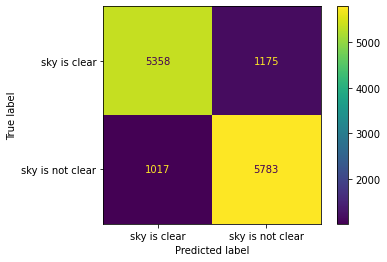

In [ ]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbclf = GradientBoostingClassifier(loss='deviance', n_estimators=200, learning_rate=0.4)
metrics_dict[model_names[2]] = cross_val_report(gbclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.826 (0.005)
                  precision    recall  f1-score   support

    sky is clear       0.83      0.82      0.82      6533
sky is not clear       0.83      0.84      0.83      6800

        accuracy                           0.83     13333
       macro avg       0.83      0.83      0.83     13333
    weighted avg       0.83      0.83      0.83     13333



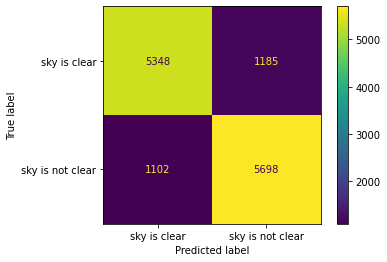

In [ ]:
#Histogram Based Gradient Boosting Machine
#HistGradientBooster should be used when minimum number of observation for each class must be >2
from sklearn.ensemble import HistGradientBoostingClassifier

hbclf = HistGradientBoostingClassifier()
metrics_dict[model_names[3]] = cross_val_report(hbclf, [x_train, x_test], [y_train, y_test])


Accuracy: 0.770 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.77      0.74      0.76      6533
sky is not clear       0.76      0.79      0.77      6800

        accuracy                           0.77     13333
       macro avg       0.77      0.76      0.76     13333
    weighted avg       0.77      0.77      0.77     13333



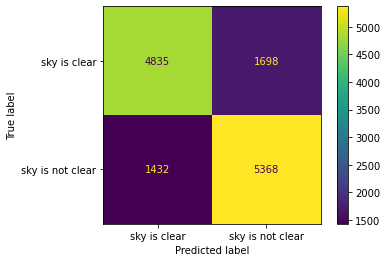

In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgbclf = XGBClassifier()
metrics_dict[model_names[4]] = cross_val_report(xgbclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.828 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.83      0.82      0.82      6533
sky is not clear       0.83      0.84      0.83      6800

        accuracy                           0.83     13333
       macro avg       0.83      0.83      0.83     13333
    weighted avg       0.83      0.83      0.83     13333



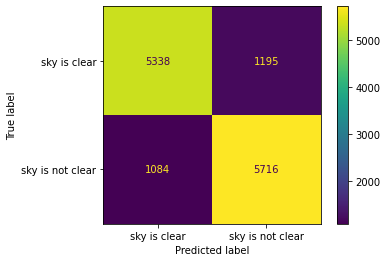

In [ ]:
#LightGBM
from lightgbm import LGBMClassifier

lgbclf = LGBMClassifier()
metrics_dict[model_names[5]] = cross_val_report(lgbclf, [x_train, x_test], [y_train, y_test])

In [ ]:
!pip install catboost

Accuracy: 0.850 (0.005)
Learning rate set to 0.044709
0:	learn: 0.6817056	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6719331	total: 24.4ms	remaining: 12.2s
2:	learn: 0.6627968	total: 34.4ms	remaining: 11.4s
3:	learn: 0.6539267	total: 44.5ms	remaining: 11.1s
4:	learn: 0.6460300	total: 55.5ms	remaining: 11s
5:	learn: 0.6387235	total: 66ms	remaining: 10.9s
6:	learn: 0.6315632	total: 76.2ms	remaining: 10.8s
7:	learn: 0.6251099	total: 86.4ms	remaining: 10.7s
8:	learn: 0.6192013	total: 96.6ms	remaining: 10.6s
9:	learn: 0.6136557	total: 107ms	remaining: 10.6s
10:	learn: 0.6085757	total: 116ms	remaining: 10.4s
11:	learn: 0.6044018	total: 126ms	remaining: 10.4s
12:	learn: 0.6000314	total: 137ms	remaining: 10.4s
13:	learn: 0.5956498	total: 155ms	remaining: 10.9s
14:	learn: 0.5918710	total: 170ms	remaining: 11.2s
15:	learn: 0.5880475	total: 183ms	remaining: 11.3s
16:	learn: 0.5844172	total: 194ms	remaining: 11.2s
17:	learn: 0.5810259	total: 204ms	remaining: 11.1s
18:	learn: 0.5778983	total: 214ms

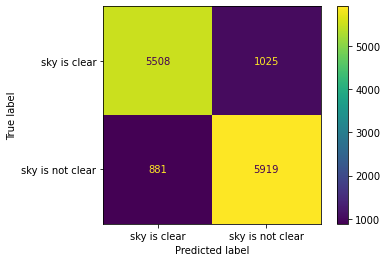

In [ ]:
#CatBoost
from catboost import CatBoostClassifier

catclf = CatBoostClassifier()
metrics_dict[model_names[6]] = cross_val_report(catclf, [x_train, x_test], [y_train, y_test])


Accuracy: 0.892 (0.004)
                  precision    recall  f1-score   support

    sky is clear       0.90      0.89      0.90      6533
sky is not clear       0.90      0.90      0.90      6800

        accuracy                           0.90     13333
       macro avg       0.90      0.90      0.90     13333
    weighted avg       0.90      0.90      0.90     13333



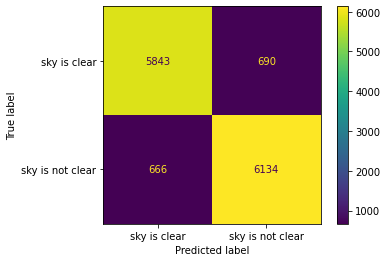

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=150, criterion='entropy')
metrics_dict[model_names[1]] = cross_val_report(rfclf, [x_train, x_test], [y_train, y_test])

### Artificial Neural Network (ANN)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dropout, Dense, Input
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

#One Hot Encoding Target Variable
le = LabelEncoder()
le.fit(target)
enc_target = le.transform(target)
dummy_target = to_categorical(enc_target)

#Splitting the dataset for ANN
X_train, X_test, Y_train, Y_test = train_test_split(features, dummy_target, test_size=0.2, random_state=100)

#Standardising the values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Building
i = Input(shape=X_train[0].shape)
x = Dense(32, activation='relu') (i)
x = Dropout(0.2) (x)
x = Dense(64, activation='relu') (x)
x = Dropout(0.2) (x)
x = Dense(2, activation='sigmoid') (x)

model = Model(i,x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40)

Epoch 1/40
1112/1112 [==============================] - 5s 3ms/step - loss: 0.5912 - accuracy: 0.6850 - precision: 0.7282 - recall: 0.4813 - val_loss: 0.5401 - val_accuracy: 0.7300 - val_precision: 0.7694 - val_recall: 0.6186
Epoch 2/40
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5475 - accuracy: 0.7226 - precision: 0.7493 - recall: 0.6256 - val_loss: 0.5234 - val_accuracy: 0.7420 - val_precision: 0.7613 - val_recall: 0.6875
Epoch 3/40
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5343 - accuracy: 0.7338 - precision: 0.7507 - recall: 0.6738 - val_loss: 0.5109 - val_accuracy: 0.7491 - val_precision: 0.7660 - val_recall: 0.7067
Epoch 4/40
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5231 - accuracy: 0.7402 - precision: 0.7502 - recall: 0.7053 - val_loss: 0.5024 - val_accuracy: 0.7534 - val_precision: 0.7623 - val_recall: 0.7328
Epoch 5/40
1112/1112 [==============================] - 3s 3ms/step - loss: 0.5144 - accuracy: 0

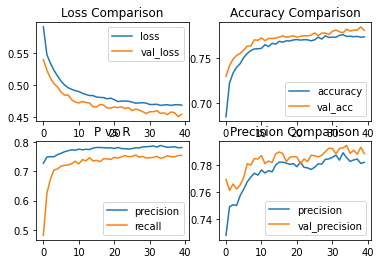

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(model.history.history['loss'], label='loss')
ax1.plot(model.history.history['val_loss'], label='val_loss')
ax1.title.set_text('Loss Comparison')
ax1.legend()
ax2.plot(model.history.history['accuracy'], label='accuracy')
ax2.plot(model.history.history['val_accuracy'], label='val_acc')
ax2.title.set_text('Accuracy Comparison')
ax2.legend()
ax3.plot(model.history.history['precision'], label='precision')
ax3.plot(model.history.history['recall'], label='recall')
ax3.title.set_text('P vs R')
ax3.legend()
ax4.plot(model.history.history['precision'], label='precision')
ax4.plot(model.history.history['val_precision'], label='val_precision')
ax4.title.set_text('Precision Comparison')
ax4.legend()

In [ ]:
ann_acc = model.history.history['val_accuracy'][-1]
ann_prec = model.history.history['val_precision'][-1]
ann_rec = model.history.history['val_recall'][-1]
ann_f1 = 2 * ((ann_prec * ann_rec)/(ann_prec + ann_rec))
metrics_dict[model_names[7]] =[ann_acc, ann_prec, ann_rec, ann_f1]

### Support Vector Machines

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Accuracy: 0.787 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.80      0.76      0.78      6533
sky is not clear       0.78      0.81      0.80      6800

        accuracy                           0.79     13333
       macro avg       0.79      0.79      0.79     13333
    weighted avg       0.79      0.79      0.79     13333



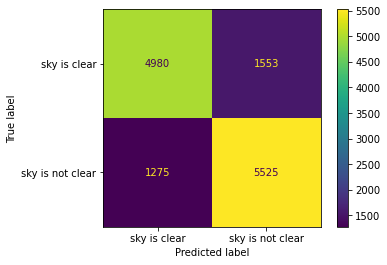

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

sclf = svm.SVC()
metrics_dict[model_names[8]] = cross_val_report(sclf, [x_train, x_test], [y_train, y_test])

# sclf.fit(x_train, y_train)
# y_pred_svm = sclf.predict(x_test)
# print(classification_report(y_test, y_pred_svm))

In [ ]:
#Creating a dictionary consisting of all the metrics of the models we observed
metrics_dict1 = {'Model': list(metrics_dict.keys()),
                 'Accuracy': [i[0] for i in list(metrics_dict.values())],
                 'Precision': [i[1] for i in list(metrics_dict.values())],
                 'Recall': [i[2] for i in list(metrics_dict.values())],
                 'F1-Score': [i[3] for i in list(metrics_dict.values())]}
metrics_dict1

{'Accuracy': [0.6978924473111828,
  0.8451961299032476,
  0.8355958898972474,
  0.8284707117677942,
  0.7652441311032776,
  0.8290707267681692,
  0.857046426160654,
  0.898297457436436,
  0.7813027501106262,
  0.7878946973674342],
 'F1-Score': [0.69762436259679,
  0.8451161399095483,
  0.8354286744984454,
  0.8283524299500398,
  0.7648683718267705,
  0.8289332296810932,
  0.8569104584523349,
  0.8982489878897961,
  0.7771376540522515,
  0.7875397082660944],
 'Model': ['Logistic Regression',
  'Decision Tree',
  'Gradient Boosting Classifier',
  'Histogram Based GBM',
  'XGBoost',
  'LightGBM',
  'CatBoost',
  'Random Forest',
  'ANN',
  'SVM'],
 'Precision': [0.6978057160705919,
  0.8451646855419519,
  0.8358001115939333,
  0.828491992967732,
  0.7655979133304256,
  0.8291462421107879,
  0.8572486494825136,
  0.8982832094509956,
  0.7882434725761414,
  0.7883754030965677],
 'Recall': [0.6975759154878851,
  0.845079933550031,
  0.8352925306813372,
  0.8282771855106653,
  0.7647502723728

In [ ]:
#Creating a Dataframe containing Metrics of the model
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient="index")
metrics_df

,0,1,2,3
Logistic Regression,0.697892,0.697806,0.697576,0.697624
Decision Tree,0.845196,0.845165,0.845080,0.845116
Gradient Boosting Classifier,0.835596,0.835800,0.835293,0.835429
Histogram Based GBM,0.828471,0.828492,0.828277,0.828352
XGBoost,0.765244,0.765598,0.764750,0.764868
LightGBM,0.829071,0.829146,0.828835,0.828933
CatBoost,0.857046,0.857249,0.856773,0.856910
Random Forest,0.898297,0.898283,0.898221,0.898249
ANN,0.781303,0.788243,0.766340,0.777138
SVM,0.787895,0.788375,0.787392,0.787540


In [ ]:
metrics_df.insert(loc=0, column = '4', value = metrics_df.index)
metrics_df.set_index([pd.Index(range(0,len(metrics_df)))], inplace=True)
metrics_df.columns = list(metrics_dict1.keys())
metrics_df.sort_values(by='Accuracy', inplace=True)
metrics_df.iloc[:,1:] = metrics_df.iloc[:,1:]*100
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,69.789245,69.780572,69.757592,69.762436
4,XGBoost,76.524413,76.559791,76.475027,76.486837
8,ANN,78.130275,78.824347,76.634043,77.713765
9,SVM,78.789470,78.837540,78.739189,78.753971
3,Histogram Based GBM,82.847071,82.849199,82.827719,82.835243
5,LightGBM,82.907073,82.914624,82.883537,82.893323
2,Gradient Boosting Classifier,83.559589,83.580011,83.529253,83.542867
1,Decision Tree,84.519613,84.516469,84.507993,84.511614
6,CatBoost,85.704643,85.724865,85.677271,85.691046
7,Random Forest,89.829746,89.828321,89.822059,89.824899


### Plots to Compare Models

In [ ]:
fig = px.histogram(metrics_df, x='Model', y= ['Accuracy','Precision','Recall','F1-Score'], 
                   labels={'variable':'Scores', 'value':'value'}, color_discrete_sequence=px.colors.qualitative.Dark2[2:6],
                   height=600, width=1600, barmode='group', title='Comparison Between Models', text_auto='0.2f')

fig.update_traces(textfont_size=14, textangle=0, textposition='auto')
fig.show()

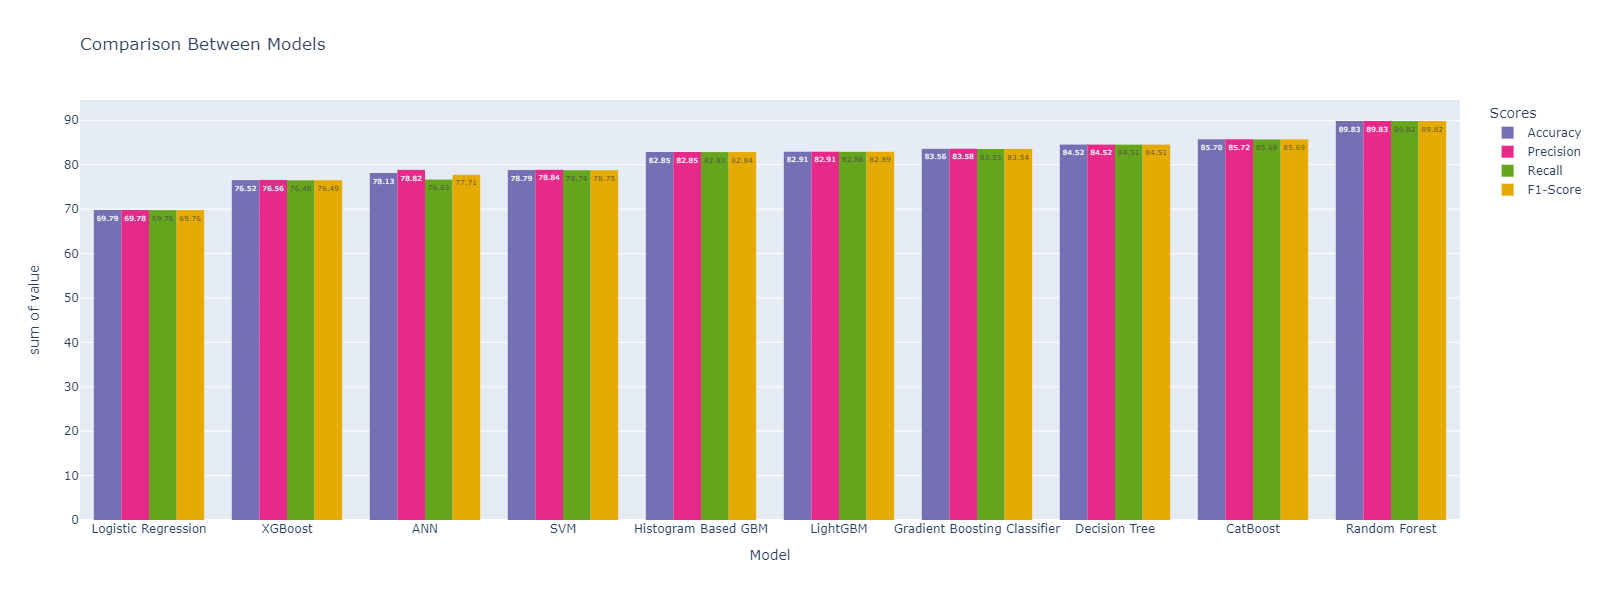

The above pic is for when the plot is not shown when saved

## **Note**:<br>
From the figure, its clear that the <i>Logistic Regression</i> has the lowest scores compared with other models and <i>Random Forest</i> has highest score compared to the rest. So for optimizing hyperparameters, we will go ahead with Random Forest Model

### Binning

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

Kbin_hum=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_pres=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_temp=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_winddir=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_wind_spd=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_year=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_month=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_day=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_hour=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_avg_hum=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_avg_pres=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_avg_temp=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_avg_winddir=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_avg_wind_spd=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

trf=ColumnTransformer([('first',Kbin_hum,[0]),('second',Kbin_pres,[1]), ('third',Kbin_temp,[2]), ('fourth',Kbin_winddir,[3]), ('fifth',Kbin_wind_spd,[4]), ('sixth',Kbin_year,[5]), ('seventh',Kbin_month,[6]), ('eighth',Kbin_day,[7]), ('ninth',Kbin_hour,[8]), ('tenth',Kbin_avg_hum,[9]),('eleventh',Kbin_avg_pres,[10]), ('twelfth',Kbin_avg_temp,[11]), ('thirteenth',Kbin_avg_winddir,[12]), ('fourteenth',Kbin_avg_wind_spd,[13])])

x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in

In [ ]:
print(trf.named_transformers_['first'].n_bins_)
print(trf.named_transformers_['first'].bin_edges_)

[15]
[array([-3.7807419 , -1.64421674, -1.09482455, -0.78960667, -0.54543237,
        -0.30125806, -0.11812734,  0.06500339,  0.12604697,  0.3091777 ,
         0.43126485,  0.61439558,  0.85856988,  0.98065703,  1.28587491,
         2.01839783])                                                   ]


In [ ]:
clf = DecisionTreeClassifier(criterion='gini').fit(x_train_trf, y_train)
y_pred_trf = clf.predict(x_test_trf)
print(classification_report(y_test, y_pred_trf))

                  precision    recall  f1-score   support

    sky is clear       0.82      0.83      0.82      6533
sky is not clear       0.83      0.83      0.83      6800

        accuracy                           0.83     13333
       macro avg       0.83      0.83      0.83     13333
    weighted avg       0.83      0.83      0.83     13333



In [ ]:
clf = RandomForestClassifier(n_estimators=120, criterion='entropy').fit(x_train_trf, y_train)
y_pred_trf = clf.predict(x_test_trf)
print(classification_report(y_test, y_pred_trf))

                  precision    recall  f1-score   support

    sky is clear       0.89      0.88      0.89      6533
sky is not clear       0.89      0.89      0.89      6800

        accuracy                           0.89     13333
       macro avg       0.89      0.89      0.89     13333
    weighted avg       0.89      0.89      0.89     13333



### Hyperparameter Optimization with Optuna:
Since we have accuracy of RandomForest model as highest, we will try to optimize the hyperparameters

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def get_params(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 500)
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
  min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
  criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  max_features = 'log2'
  bootstrap = False
  clf = RandomForestClassifier(criterion = criterion, n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features, bootstrap = bootstrap )
  return cross_val_score(clf, x_train, y_train, n_jobs=-1, cv=3).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(get_params, n_trials=10)

[I 2022-02-23 11:11:55,251] A new study created in memory with name: no-name-2b4fef38-bda1-4ec8-b10a-3cecbc61b307
[I 2022-02-23 11:12:06,922] Trial 0 finished with value: 0.6896717179161893 and parameters: {'n_estimators': 243, 'max_depth': 2.909071790597072, 'min_samples_split': 8, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6896717179161893.
[I 2022-02-23 11:12:54,878] Trial 1 finished with value: 0.792728712315618 and parameters: {'n_estimators': 423, 'max_depth': 9.331470280171482, 'min_samples_split': 5, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 1 with value: 0.792728712315618.
[I 2022-02-23 11:13:24,890] Trial 2 finished with value: 0.7660482611438622 and parameters: {'n_estimators': 423, 'max_depth': 7.100081008789976, 'min_samples_split': 20, 'min_samples_leaf': 5, 'criterion': 'gini'}. Best is trial 1 with value: 0.792728712315618.
[I 2022-02-23 11:13:38,135] Trial 3 finished with value: 0.6936576458541596 and parameters: {

In [ ]:
study.best_trial.params

{'criterion': 'gini',
 'max_depth': 14.170713831087097,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 266}

In [ ]:
clf = RandomForestClassifier(criterion='gini', n_estimators=266, max_depth=14.170713831087097, min_samples_leaf=7, min_samples_split=3).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    sky is clear       0.86      0.82      0.84      6533
sky is not clear       0.83      0.87      0.85      6800

        accuracy                           0.84     13333
       macro avg       0.84      0.84      0.84     13333
    weighted avg       0.84      0.84      0.84     13333



## Saving Model
Since RandomForest performed best than other classifiers, we are going ahead with this model

Accuracy: 0.892 (0.005)
Model saved to:/content/savemodel.pkl
                  precision    recall  f1-score   support

    sky is clear       0.90      0.89      0.89      6533
sky is not clear       0.90      0.90      0.90      6800

        accuracy                           0.90     13333
       macro avg       0.90      0.90      0.90     13333
    weighted avg       0.90      0.90      0.90     13333



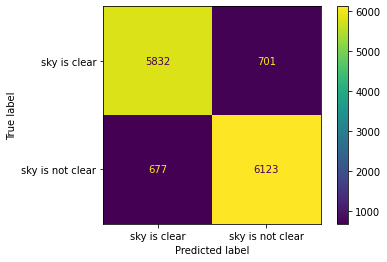

[0.8966474161854047,
 0.8966322466844987,
 0.8965698917711888,
 0.8965981602596895]

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

final_rfclf = RandomForestClassifier(n_estimators=150, criterion='entropy')
cross_val_report(rfclf, [x_train, x_test], [y_train, y_test], save=True)

### **Observations**

1. Addition of new features drastically improved model performance

2. Even after optimisation, the model score isn't getting much of an improvement.

3. From the correlation matrix (heatmap), we can see that the variables have very less correlation between them with the exclusion of wind_speed and wind_direction (correlation=0.56) and temperature and avg_temperature which had a high correlation(0.88).

4. Introduction of Binning Technique further deteriorated the score.
